
Tugas Akhir ini merupakan tugas pada Pelatihan Microcredential Certification Associate Data Scientist tahun 2021. Daftar Nama Kelompok yang mengerjakan tugas akhir ini adalah: 

Silmi 'Afifah Kamal






Kelompok ini merupakan peserta pelatihan di Kelas UGM-07, dengan host pelaksana adalah UGM. 


---



### **Membuat Model Klasifikasi 3 Kelas Makanan**

---


## **Business Understanding**

Problem / Goal :  Membuat model yang dapat mengklasifikasi/mengidentifikasi gambar sebuah makanan




## **Analytic Approach**
Pendekatan analitik yang digunakan adalah Predictive Analytics 

## **Data Requirements**
Untuk saat ini, kita akan menggunakan dataset yang sudah ada dari Kaggle Dataset (https://www.kaggle.com/ameyalaad/food101)



In [ ]:
# Import Library
import tensorflow as tf
import os,zipfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ekstrak file zip
local_zip = 'drive/MyDrive/food_class.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
src = os.listdir()[2]   
dst ='/content/food_class'       
os.rename(src, dst) 

# **Data Understanding**

Data yang digunakan adalah data cheesecake, donuts, dan french fries.
 
 





In [ ]:
base_dir = "food_class"
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')

train_cheesecake = os.path.join(train_dir, 'cheesecake')
train_donuts = os.path.join(train_dir, 'donuts')
train_french_fries = os.path.join(train_dir, 'french_fries')

val_cheesecake = os.path.join(val_dir, 'cheesecake')
val_donuts = os.path.join(val_dir, 'donuts')
val_french_fries = os.path.join(val_dir, 'french_fries')

# **Data Preparation**
 Jumlah data yang digunakan :

Training folder berisi 3 class masing-masing berisi 900 images

Validation folder berisi 3 class masing-masing berisi 100 images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 30,
    # karena ada lebih dari 2 kelas klasifikasi maka menggunakan class_mode='categorical'
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# **Modeling**


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85):
      print("\nAkurasi di atas 85%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 90, 
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/30
90/90 - 160s - loss: 1.0464 - accuracy: 0.4515 - val_loss: 0.9135 - val_accuracy: 0.5867
Epoch 2/30
90/90 - 156s - loss: 0.8929 - accuracy: 0.5881 - val_loss: 0.8973 - val_accuracy: 0.5867
Epoch 3/30
90/90 - 154s - loss: 0.8581 - accuracy: 0.6185 - val_loss: 0.7964 - val_accuracy: 0.6900
Epoch 4/30
90/90 - 155s - loss: 0.7781 - accuracy: 0.6485 - val_loss: 0.7727 - val_accuracy: 0.6667
Epoch 5/30
90/90 - 156s - loss: 0.7633 - accuracy: 0.6630 - val_loss: 0.7369 - val_accuracy: 0.7000
Epoch 6/30
90/90 - 155s - loss: 0.7405 - accuracy: 0.6741 - val_loss: 0.8303 - val_accuracy: 0.6467
Epoch 7/30
90/90 - 155s - loss: 0.6726 - accuracy: 0.7141 - val_loss: 0.6633 - val_accuracy: 0.7267
Epoch 8/30
90/90 - 158s - loss: 0.6305 - accuracy: 0.7300 - val_loss: 0.6050 - val_accuracy: 0.7700
Epoch 9/30
90/90 - 158s - loss: 0.5949 - accuracy: 0.7404 - val_loss: 0.5497 - val_accuracy: 0.7567
Epoch 10/30
90/90 - 158s - loss: 0.5670 - accuracy: 0.7559 - val_loss: 0.6114 - val_accuracy: 0.7467

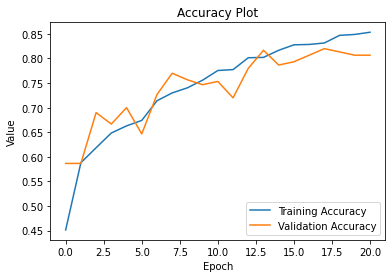

In [ ]:
# Visualisasi accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

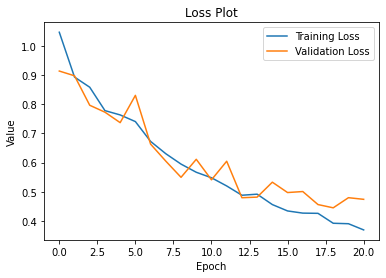

In [ ]:
# Visualisasi loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# **Evaluation**

Saving kentang.png to kentang.png
kentang.png
French fries


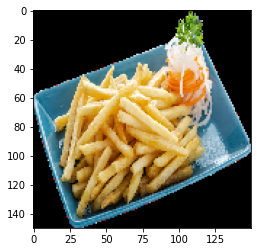

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Cheese cake')
  elif classes[0,1]!=0:
    print('Donut')
  else:
    print('French fries')